In [100]:
import numpy as np
import math
import re
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
player_name = "Roger Federer"
filename = "./{name}.csv".format(name=player_name.replace(' ', '-'))
data = pd.read_csv(filename)
data

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396,"$9,800",R32,...,22,4,8,8,36,50,26,53,62,103
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878,"$10,800",R32,...,19,0,1,8,33,65,8,41,41,106
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878,"$10,800",R16,...,30,0,4,10,46,75,23,73,69,148
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878,"$10,800",Q,...,28,3,10,10,44,63,26,67,70,130
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,"Gstaad, Switzerland",06.07.1998,WS,Outdoor: Clay,Draw: 32,1,702,"$5,250",R32,...,38,4,5,10,38,62,35,74,73,136
6,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",R16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
data['win'] = data['winner'] == player_name #map aaaa.map{|item| item == ~}と似たようなもの
data['win']


0       False
1        True
2        True
3       False
4       False
5       False
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14       True
15       True
16      False
17       True
18       True
19      False
20       True
21      False
22       True
23      False
24      False
25       True
26      False
27      False
28      False
29      False
        ...  
1149     True
1150    False
1151     True
1152     True
1153     True
1154     True
1155     True
1156     True
1157     True
1158     True
1159     True
1160     True
1161     True
1162     True
1163     True
1164     True
1165     True
1166     True
1167     True
1168    False
1169     True
1170     True
1171     True
1172     True
1173     True
1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [103]:
data.groupby('year')['win'].mean()

year
1998    0.333333
1999    0.557692
2000    0.545455
2001    0.712329
2002    0.741176
2003    0.828283
2004    0.927711
2005    0.954023
2006    0.950495
2007    0.896552
2008    0.826087
2009    0.851852
2010    0.853933
2011    0.857143
2012    0.861702
Name: win, dtype: float64

In [104]:
date = pd.to_datetime(data['start date'])
date

0      1998-05-10
1      1998-09-28
2      1998-09-28
3      1998-09-28
4      1998-08-24
5      1998-06-07
6      1999-10-25
7      1999-10-25
8      1999-10-25
9      1999-10-25
10     1999-10-25
11     1999-10-18
12     1999-10-18
13     1999-11-10
14     1999-11-10
15     1999-11-10
16     1999-11-10
17     1999-04-10
18     1999-04-10
19     1999-04-10
20     1999-09-27
21     1999-09-27
22     1999-09-13
23     1999-09-13
24     1999-08-16
25     1999-02-08
26     1999-02-08
27     1999-07-16
28     1999-07-16
29     1999-05-07
          ...    
1149   2012-03-21
1150   2012-03-21
1151   2012-08-03
1152   2012-08-03
1153   2012-08-03
1154   2012-08-03
1155   2012-08-03
1156   2012-08-03
1157   2012-08-03
1158   2012-02-27
1159   2012-02-27
1160   2012-02-27
1161   2012-02-27
1162   2012-02-27
1163   2012-02-13
1164   2012-02-13
1165   2012-02-13
1166   2012-02-13
1167   2012-02-13
1168   2012-10-02
1169   2012-01-16
1170   2012-01-16
1171   2012-01-16
1172   2012-01-16
1173   201

In [105]:
 (data['player1 double faults']/data['player2 total points total'])

0       0.019417
1       0.000000
2       0.020270
3       0.046154
4            NaN
5       0.022059
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11      0.007937
12      0.019417
13      0.009804
14      0.022901
15      0.025641
16      0.027027
17      0.006849
18           NaN
19      0.020833
20      0.014184
21      0.021429
22      0.018182
23      0.020619
24      0.030534
25           NaN
26           NaN
27           NaN
28           NaN
29      0.037736
          ...   
1149    0.008197
1150    0.005917
1151         NaN
1152    0.010000
1153    0.032609
1154    0.006410
1155    0.000000
1156    0.017857
1157    0.015748
1158    0.008850
1159    0.008403
1160    0.000000
1161    0.024540
1162    0.015385
1163    0.009091
1164         NaN
1165    0.006410
1166    0.005155
1167    0.026087
1168         NaN
1169    0.011364
1170         NaN
1171    0.000000
1172    0.017544
1173    0.006098
1174    0.018116
1175    0.000000
1176    0.0000

In [106]:
math.isnan(10)

False

In [107]:
data['df ratio'] = (data['player1 double faults']/data['player2 total points total'])
data['df ratio'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: df ratio, dtype: float64

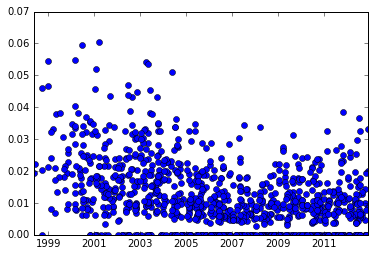

In [108]:
plt.plot_date(date, data['df ratio'])

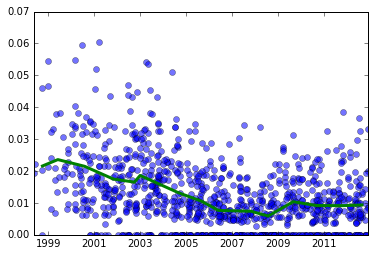

In [109]:

plt.plot_date(date, data['df ratio'], alpha=0.55, lw=0)
plt.plot_date(pd.to_datetime(grp_year['start date'].max()), grp_year['df ratio'].mean(), '-', lw=3)

In [169]:
p = re.compile("^(\d\d)\.(\d\d)\.(\d\d\d\d)")
list(data['start date'])
data['start month'] = (list(map(lambda n:re.sub(u'^(\d\d)\.(\d\d)\.(\d\d\d\d)', r'\3-\2-15', n), list(data['start date']))))
grp_month = data.groupby('start month')
grp_month['df ratio'].mean()

start month
1998-07-15    0.022059
1998-08-15         NaN
1998-09-15    0.022141
1998-10-15    0.019417
1999-01-15         NaN
1999-02-15    0.031078
1999-03-15    0.033333
1999-04-15    0.017241
1999-05-15    0.013333
1999-06-15    0.028111
1999-07-15    0.037736
1999-08-15    0.030534
1999-09-15    0.018603
1999-10-15    0.017551
2000-01-15    0.024809
2000-02-15    0.023210
2000-03-15    0.014728
2000-04-15    0.029542
2000-05-15    0.018855
2000-06-15    0.022175
2000-07-15    0.017227
2000-08-15    0.026808
2000-09-15         NaN
2000-10-15    0.015567
2000-11-15    0.025093
2001-01-15    0.018513
2001-02-15    0.017121
2001-03-15    0.029854
2001-04-15    0.011941
2001-05-15    0.015690
                ...   
2009-11-15    0.007223
2010-01-15    0.009283
2010-03-15    0.007195
2010-04-15    0.016393
2010-05-15    0.005894
2010-06-15    0.011186
2010-08-15    0.009302
2010-10-15    0.011354
2010-11-15    0.009412
2011-01-15    0.003343
2011-02-15    0.018475
2011-03-15    0.012714

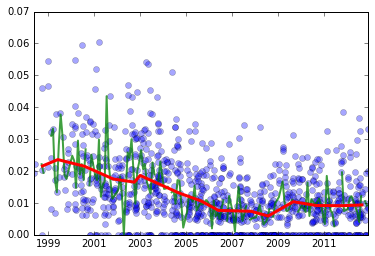

In [170]:
plt.plot_date(date, data['df ratio'], alpha=0.35, lw=0)
plt.plot_date(pd.to_datetime(grp_month['start month'].max()), grp_month['df ratio'].mean(), '-', alpha=0.75, lw=2)
plt.plot_date(pd.to_datetime(grp_year['start date'].max()), grp_year['df ratio'].mean(), '-', lw=3)

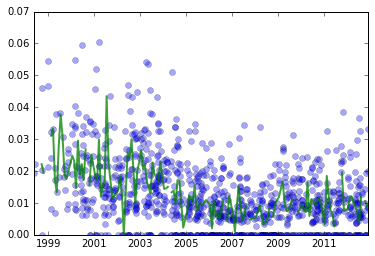

In [172]:
plt.plot_date(date, data['df ratio'], alpha=0.35, lw=0)
plt.plot_date(pd.to_datetime(grp_month['start month'].max()), grp_month['df ratio'].mean(), '-', alpha=0.75, lw=2)